In [1]:
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model


from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
pd.options.display.max_columns = 200

In [3]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")][:5])

In [4]:
df=df.drop(["age", "gender",'hashtags','Unnamed: 0'], axis=1)

df.insert(df.columns.get_loc("respectability")+1,'is respactable?' ,[1 if x >= .75 else 0 for x in df['respectability']])

df=df.drop_duplicates(subset='text',keep=False)

In [5]:
dups = df[df['name'].duplicated(keep = False)]['name'].value_counts()

for n in dups.keys():
    if dups[n] > 2:
        df.drop(df[df['name'] == n].index,inplace = True)

In [6]:
df=df.drop(["link to tweet"], axis=1)

column_to_move = df.pop("retweets")

df.insert(df.shape[1], "retweets", column_to_move)

df.reset_index(drop = True, inplace = True)
df.columns

Index(['name', 'city', 'country', 'acount age', 'total tweets', 'followers',
       'following', 'respectability', 'is respactable?', 'verified', 'text',
       'views', 'likes', 'quote retweets', 'comments', 'word count',
       'is quote', 'hashtag count', 'trending', 'using trends?', 'retweets'],
      dtype='object')

In [7]:
df.drop(df[df['followers']> 6000000] .index,inplace = True)
df.reset_index(inplace=True,drop = True)

In [8]:
nm = ['total tweets',"respectability","verified","comments","word count","hashtag count","views","quote retweets","likes",'using trends?']
models = []

for n in nm:
    models.append(linear_model.LinearRegression().fit(df[[n]],df['retweets']))


'''
fig, ax = plt.subplots(nrows=len(models),ncols = 1)

for i in range(0,len(nm)):
    ax[i].scatter(x = df[nm[i]], y = df['retweets'],label = nm[i])
    ax[i].plot(df[nm[i]],models[i].predict(df[nm[i]].reset_index()),c = 'r')
    ax[i].set_xlabel(nm[i], fontsize=10)
'''
models[0]

LinearRegression()

In [9]:
def SSE(Y,Y_H):
    see=sum([(y-y_h)**2 for y,y_h in zip(Y,Y_H)])
    return see

SseS = []

for i in range(0,len(nm)):
    SseS.append(SSE(df.retweets.tolist(),models[i].predict(df[[nm[i]]]).flatten()))
    


In [10]:
SseS

[3083958.7021195656,
 3080814.0582706584,
 3076793.3390380773,
 2310043.4383162134,
 3074823.403612707,
 3082979.0262496853,
 1979532.1339748406,
 1200843.4488784515,
 1013642.9003682919,
 3084166.0091036693]

In [11]:
from sklearn.metrics import r2_score
r2_scores = []

for i in range(0,len(nm)):
    r2_scores.append(r2_score(df.retweets.tolist(),models[i].predict(df[[nm[i]]]).flatten()))

r2_scores

[6.811125407213403e-05,
 0.0010877194807115131,
 0.0023913832987965122,
 0.2509996658602335,
 0.0030301082107467847,
 0.00038575790158845713,
 0.3581634850692731,
 0.6106427569539638,
 0.6713400023215355,
 8.947689013050208e-07]

### Clrealy singular linear regression is shit lets try to check it

In [12]:
lr = linear_model.LinearRegression() # create a linear regression object
x = df[['total tweets',"respectability","verified","comments","word count","hashtag count","views","quote retweets","likes",'using trends?']]
y = df['retweets']
lr.fit(X=x, y=y);


In [13]:
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)


Slope: [ 9.61628227e-07 -2.54455508e-03  1.89615250e+00 -2.05882187e-01
  1.83931298e-02  2.20451411e-02 -4.59517695e-04  5.90988976e+00
  9.78999896e-02  1.01693883e+00]
Intercept: -0.3459533018267318


In [14]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x.values)))

R2: 0.7815758542963638
R2: 0.7815758542963638


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
df.corr()


for i in range(0,df.shape[0]):
    if df.loc[i,'is quote'] == True:
        df.loc[i,'is quote'] = 1
    else:
        df.loc[i,'is quote'] = 0
        
for i in range(0,df.shape[0]):
    if df.loc[i,'using trends?'] == True:
        df.loc[i,'using trends?'] = 1
    else:
        df.loc[i,'using trends?'] = 0
        
for i in range(0,df.shape[0]):
    if df.loc[i,'verified'] == True:
        df.loc[i,'verified'] = 1
    else:
        df.loc[i,'verified'] = 0

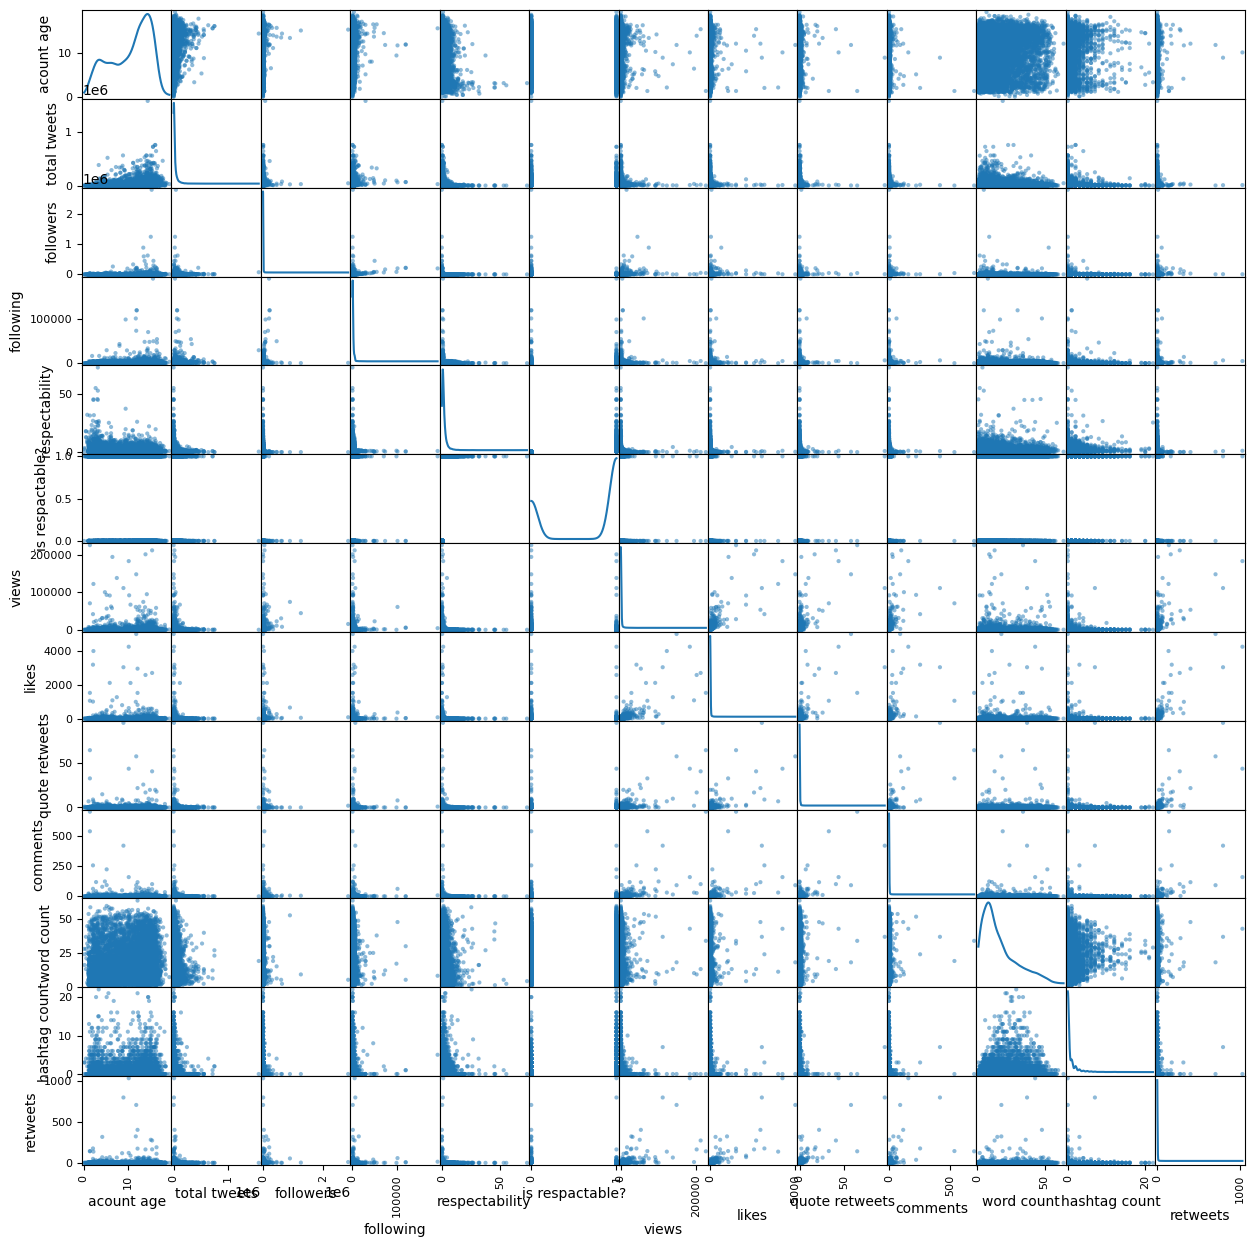

In [40]:


pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='kde')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

In [17]:
df

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,retweets
0,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,0,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,1,10,0,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",0,0
1,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,0,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,10,0,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",0,0
2,CentralNY911,Syracuse,United States,7.7,34240,772,41,0.053109,0,0,01/13/2023 - 2:51 PM\nSyracuse Police dispatch...,50,0,0,0,24,0,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",0,0
3,meredithhurston,Baltimore,United States,14.5,4599,1966,2436,1.239064,1,0,Happy Friday! January is cervical cancer aware...,28,1,0,0,34,0,0,"['Friday the 13th', 'Staley', 'Phineas', 'Lori...",0,0
4,CochinoChuy,Washington,United States,16.1,81950,677,975,1.440177,1,0,how does mrs akon tell akon she’s pregnant?\n\...,68,2,0,0,10,0,0,"['State of the Union', 'Friday the 13th', 'Sta...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,kiwi3049,Nelson City,New Zealand,6.8,91,4,34,8.500000,1,0,#chatrooms,24,0,0,0,1,0,1,"['Rashford', '#BRIvWEL', 'Liverpool', '#MUNMCI...",0,0
7861,UpTheTics_NZ,Auckland,New Zealand,1.8,211,106,54,0.509434,0,0,Decent performance and a deserved point. The w...,470,8,0,0,41,0,0,"['#BRIvWEL', 'Rashford', 'Liverpool', '#MUNMCI...",0,0
7862,markdalgarno,Queenstown,New Zealand,15.8,37131,4293,2968,0.691358,0,0,5 years ago I had just arrived in Queenstown. ...,1026,6,0,2,34,0,0,"['Rashford', '#BRIvWEL', 'Liverpool', '#MUNMCI...",0,0
7863,paul_brabin,Auckland,New Zealand,12.2,6173,64686,1163,0.017979,0,0,"True words #inspiration @ Auckland, New Zealan...",23,0,0,0,8,0,1,"['#BRIvWEL', 'Rashford', 'Liverpool', '#MUNMCI...",0,0
